In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk

In [2]:
print("numpy",np.__version__)
print("pandas", pd.__version__)
print("nltk", nltk.__version__)

numpy 2.0.2
pandas 2.2.2
nltk 3.9.1


In [3]:
df = pd.read_csv('spam.csv', encoding = 'latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# dropping last 3 columns
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [6]:
# assigning column names
df.columns = ['labels', 'message']

In [7]:
# mapping names of ham and spam to integer
df['labels'] = df['labels'].map({'ham':0, 'spam':1})

In [8]:
# checking for null values
df.isnull().sum()

,0
labels,0
message,0


In [9]:
# checking for duplicate values
df.duplicated().sum()

np.int64(403)

In [10]:
# remove duplicates
df = df.drop_duplicates(keep = "first")

In [11]:
df.shape

(5169, 2)

In [12]:
df["labels"].value_counts()

,count
labels,
0,4516
1,653


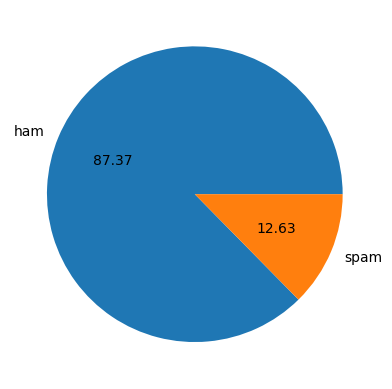

In [13]:
plt.pie(df["labels"].value_counts(), labels = ["ham", "spam"], autopct = "%0.2f")
plt.show()

it clarifies that:
1. data is unbalanced

In [14]:
df['num_characters'] = df['message'].apply(len)

In [15]:
# for making column of word count
import string
def remove(text):
    return text.translate(str.maketrans('','',string.punctuation))   # made this type of function so that it will took much lesser time than the usual one
df['word_count'] =  df['message'].apply(remove).apply(lambda x: len(x.split()))

In [16]:
df[['num_characters', 'word_count']].describe()

,num_characters,word_count
count,5169.000000,5169.000000
mean,78.977945,15.128652
std,58.236293,10.848052
min,2.000000,0.000000
25%,36.000000,7.000000
50%,60.000000,12.000000
75%,117.000000,22.000000
max,910.000000,171.000000


In [17]:
df[df['labels']==0][['num_characters', 'word_count']].describe()

,num_characters,word_count
count,4516.000000,4516.000000
mean,70.459256,13.936005
std,56.358207,10.884112
min,2.000000,0.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,18.000000
max,910.000000,171.000000


In [18]:
df[df['labels']==1][['num_characters', 'word_count']].describe()

,num_characters,word_count
count,653.000000,653.000000
mean,137.891271,23.376723
std,30.137753,5.869141
min,13.000000,2.000000
25%,132.000000,21.000000
50%,149.000000,25.000000
75%,157.000000,27.000000
max,224.000000,34.000000


from ham and spam description we got to know that spam messages are lengtheir and somwhat large than normal messages

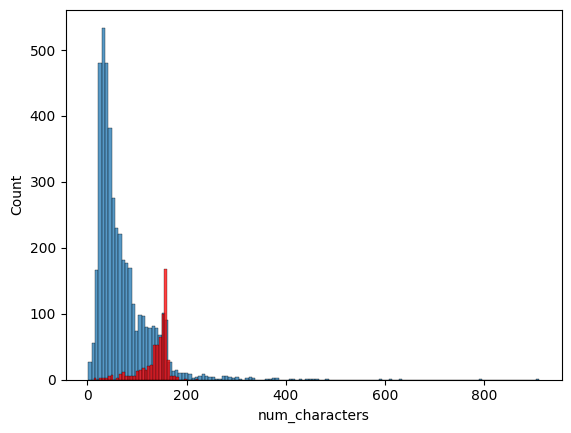

In [19]:
# comparing ham spam messages by histplot
sns.histplot(df[df['labels']==0]['num_characters'])
sns.histplot(df[df['labels']==1]['num_characters'], color = 'red')
plt.show()

In [20]:
def clean_data(text):
    if not isinstance(text, str):
        return ''

    # step 1 -> lower case
    text = text.lower()

    # step 2 -> tokenization
    text = nltk.word_tokenize(text)

    # step 3 -> Removing Special Characters
    y=[]
    for i in text:
      if i.isalnum():
        y.append(i)

    text = y[:]
    y.clear()

    # step 4 -> Removing Stopwords and Punctuation
    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)
    # text = y[:]
    # y.clear()

    # step 5 -> Stemming
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    text = y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)

    # text = re.sub(r'\W', ' ' , text) # replaces every non-word character in text with a space ' '.
    # text = re.sub(r'\s+', ' ', text) #replaces one or more whitespace characters (like spaces, tabs, or newlines) with a single space ' '.
    # return text.strip()

## DATA PREPROCESSING
1. Lower Case
2. Tokenization
3. Removing specila characters
4. removing stop words and punctuation
5. stemming

In [21]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
clean_data('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [22]:
df['transformed_text'] = df['message'].apply(clean_data)

In [23]:
from wordcloud import WordCloud
wc = WordCloud(width = 1500, height = 1500, min_font_size = 10, background_color = 'white')

In [24]:
spam_wc = wc.generate(df[df['labels']==1]['transformed_text'].str.cat(sep=" "))

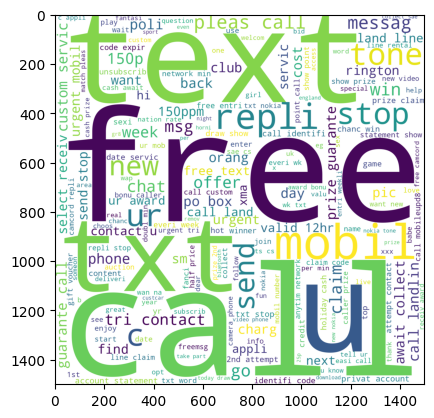

In [25]:
plt.imshow(spam_wc)

In [26]:
ham_wc = wc.generate(df[df['labels'] == 0]['transformed_text'].str.cat(sep = " "))

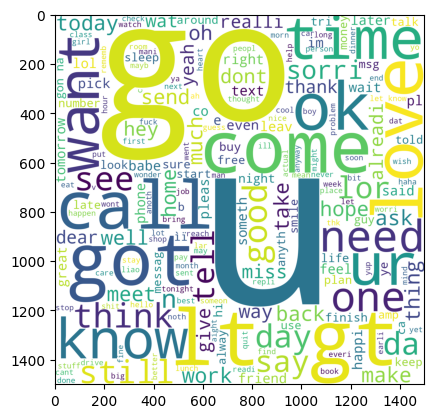

In [27]:
plt.imshow(ham_wc)

In [28]:
# getting top words from spam (the words that are most repeating )
spam_corpus = []
for msg in df[df['labels'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [29]:
len(spam_corpus)

9939

/tmp/ipython-input-1147983692.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Word', y = 'Frequency', data = word_freq, palette = 'coolwarm')


<Axes: xlabel='Word', ylabel='Frequency'>

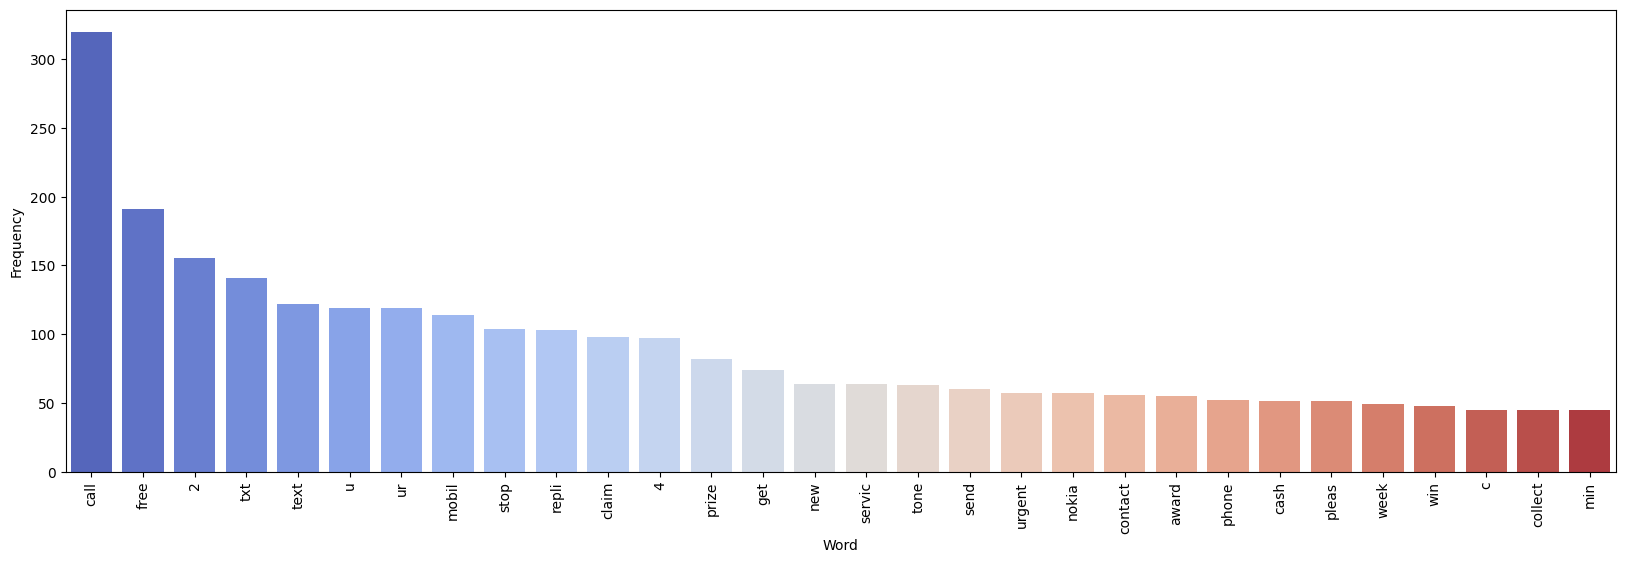

In [62]:
from collections import Counter
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns = ['Word', 'Frequency'])
plt.figure(figsize = (20,6))
plt.xticks(rotation = 'vertical')
sns.barplot(x = 'Word', y = 'Frequency', data = word_freq, palette = 'coolwarm')


/tmp/ipython-input-2009739875.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'word', y= 'frequency',data = freq ,palette = 'coolwarm')


<Axes: xlabel='word', ylabel='frequency'>

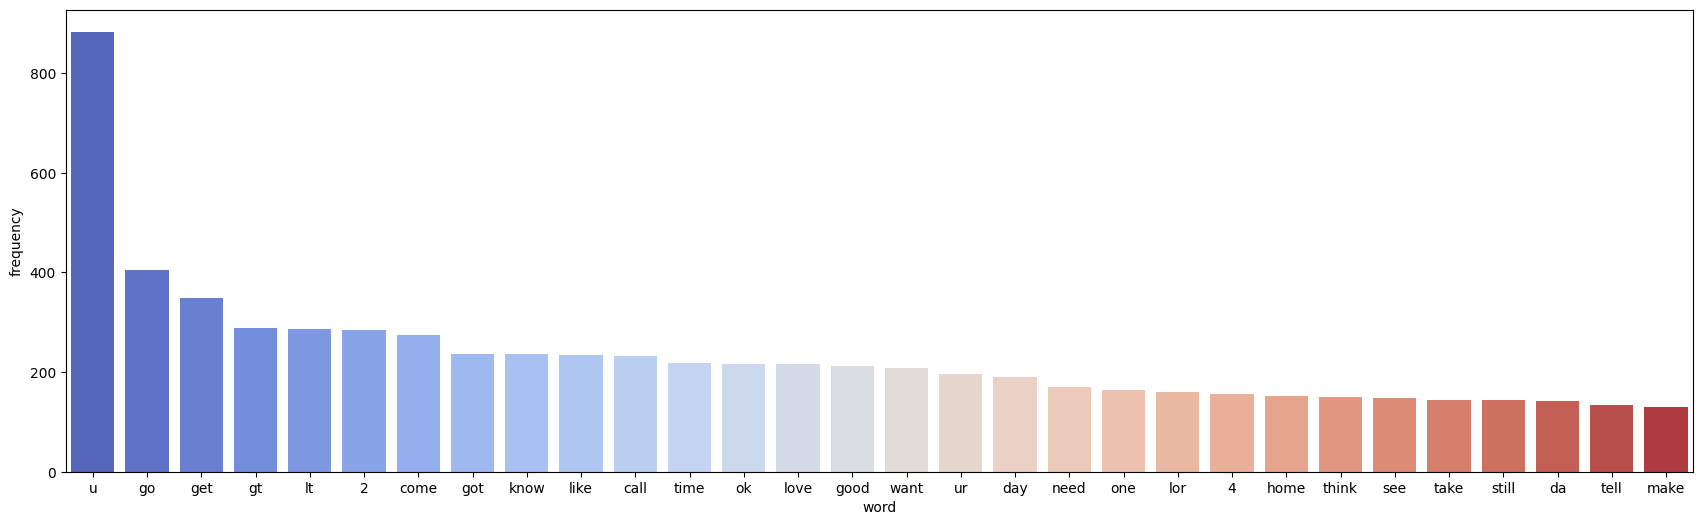

In [61]:
# calculating out the top words from ham
ham_corpus = []
for msg in df[df['labels'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns = ['word', 'frequency'])
plt.figure(figsize = (21,6))
sns.barplot(x = 'word', y= 'frequency',data = freq ,palette = 'coolwarm')


# Model Building

Here we had used bag of words and not much accuracy we had recieved so now we will use the tf-idf vectorizer


In [91]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [92]:
# now we are converting the dense array into the sparse array(now we r changing this cv to tfidf becoz the desired results are not coming)
x = tfidf.fit_transform(df['transformed_text']).toarray()
x.shape
y = df['labels'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [93]:
# doing train test and split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [97]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [98]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [99]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [31]:
df.columns

Index(['labels', 'message', 'num_characters', 'word_count',
       'transformed_text'],
      dtype='object')

In [ ]:
gh

In [ ]:
df['message'][0]

In [ ]:
df['message']= df['message'].apply(clean_data)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# splitting data into test and training datasets
X_train, X_test, Y_train, Y_test = train_test_split(
    df['message'],
    df['labels'],
    test_size = 0.2,
    random_state = 42
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features = 2000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Training on naive bayes classifier
mnb = MultinomialNB(alpha = 0.35)
mnb.fit(X_train_vec, Y_train)

# predict the test
y_pred = mnb.predict(X_test_vec)

# evaluate the result
print("Classification Report: ", classification_report(Y_test, y_pred, target_names=["ham","spam"]))
print("Confusion Matrix: ", confusion_matrix(Y_test, y_pred))

In [ ]:
import pickle

In [ ]:
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))